# ANÁLISIS Y PROCESAMIENTO INTELIGENTE DE TEXTOS

## Proyecto final: Analizador de sentimientos de publicaciones en Reddit 🤖

**Profesor:** M.P. Octavio Augusto Sanchez  
**Grupo:** 01

**Alumnos:**
- David
- Wicho
- Javier
- Brenda
- Isra


        - Seleccione el valor de control de procesos con la variable: "ejecuta" para definir el punto de partida

**Opciones de Ejecución:**
1. Ejecutar desde el inicio  
   - Descarga Datos de Reddit y sigue los procesos desde ahí
2. Limpia los datos descargados  
   - Preprocesamiento
3. Entrenamiento de modelo  
   - Tokeniza
   - Segmenta datos de entrenamiento y pruebas
   - Entrena el modelo
4. Análisis y Resultados 

Nota: si es la primer ejecucion al abrir el notebook es necesario ejecutar el estado anterior al estado objetivo



In [33]:
ejecuta = 1

## 1 Conexion a la API de Reddit  
En esta seccion se descargan los datos  


In [34]:
if ejecuta == 1: 
    import praw
    from langdetect import detect
    print("importando librerias")

importando librerias


In [35]:
if ejecuta == 1: 
    # Credenciales de la API de Reddit
    reddit = praw.Reddit(
        client_id="8MLdeP4d-tobayhY1cN3iQ",
        client_secret="XVH7RcaOLYaun1ms4F5C8kMwTOymdQ",
        user_agent="script:Caza Toxicos (by SuperCash9022)"
    )

    # Verificar autenticación
    try:
        reddit.user.me()
        print("Autenticación exitosa")
    except Exception as e:
        print(f"Error durante la autenticación: {e}")
        exit()

    # Lista de subreddits relevantes
    #subreddits = ["Mexico", "politica", "worldnews", "news","presidente"]
    subreddits = ["Mexico", "mexico", "politica", "worldnews", "news", "coyoacan","gobierno", "EleccionesMéxico2024", "politicaMX", "morena", "PVEM", "PT", "pan", "pri", "prd", "mc", "Giovani Gutiérrez", "Hanna de Lamadrid Téllez", "Sofía Margarita Provencio Odonoghue","2dejunio"]

    # Palabras clave relacionadas con política en México
    #query = "política"
    query = "política", "politicaMX","elecciones","2dejunio", "2 de junio","mexico"

    # Recolectar posts relevantes
    posts = []
    try:
        for subreddit_name in subreddits:
            subreddit = reddit.subreddit(subreddit_name)
            #for post in subreddit.search(query, sort="new", limit=1000):  # Ajustar sort a "new" para obtener posts recientes
            for post in subreddit.search(query, sort="new", limit=10000):  # Ajustar sort a "new" para obtener posts recientes
                # Detectar el idioma del post
                try:
                    if detect(post.title + " " + post.selftext) == 'es':
                        posts.append(post.title + "\n" + post.selftext)
                        print(f"Post recolectado: {post.title[:50]}")  # Mostrar los primeros 50 caracteres del título
                except:
                    # En caso de que no se pueda detectar el idioma, ignorar el post
                    continue
    except Exception as e:
        print(f"Error durante la recolección de posts: {e}")

    # Guardar los posts en un archivo para su posterior análisis
    try:
        with open('reddit_posts.txt', 'w', encoding='utf-8') as f:
            for post in posts:
                f.write("%s\n\n" % post)
        print("Posts guardados en 'reddit_post.txt'.") # ------------------------------------- Se guardan en un archivo de texto
    except Exception as e:
        print(f"Error al guardar los posts: {e}")

Autenticación exitosa
Post recolectado: Cuenten chismes
Post recolectado: Les recomiendo estas tazas para su cafecito mexica
Post recolectado: Los hombres platican de su vida amorosa?
Post recolectado: De Saltillo a Queretaro 
Post recolectado: Mi amigo fue egoista?
Post recolectado: ¿Alguien puede decirme dónde es más barato comprar
Post recolectado: Odio mi voz 
Post recolectado: Me salvó un Ángel en mi trabajo 
Post recolectado: Maduros
Post recolectado: Mis suegros no tienen cuenta de banco. ¿Qué banco 
Post recolectado: Vendedoras de contenido mexicanas que me recomiend
Post recolectado: Universidad Autonoma Paga Menos a nuevos miembros 
Post recolectado: Licencia de conducir Mexicana
Post recolectado: Me gusta provocar
Post recolectado: Busco el nombre de un pueblo semi-abandonado en Sa
Post recolectado: Mi abuela Flor; murió.
Post recolectado: Mexico necessita un Bukele?
Post recolectado: Derechos de los hombres en mexico
Post recolectado: Sobrepeso?
Post recolectado: ¿Qué carre

In [36]:
ejecuta = 2 # Cambiar a 2 para ejecutar el siguiente bloque de código

## 2 Limpieza de los datos

In [37]:
if ejecuta == 2:
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import nltk
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    # Descargar recursos necesarios de nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    print("Recursos descargados para la limpieza de datos")

Recursos descargados para la limpieza de datos


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
if ejecuta == 2:
    def remove_special_characters(text):
        # Eliminar caracteres especiales y signos de puntuación
        clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return clean_text

    def convert_to_lowercase(text):
        # Convertir texto a minúsculas
        lowercase_text = text.lower()
        return lowercase_text

    def tokenize_text(text):
        # Tokenizar el texto en palabras individuales
        tokens = word_tokenize(text)
        return tokens

    def remove_stopwords(tokens):
        # Obtener lista de stopwords en español
        spanish_stopwords = set(stopwords.words('spanish'))
        # Eliminar stopwords del texto tokenizado
        filtered_tokens = [word for word in tokens if word not in spanish_stopwords]
        return filtered_tokens

    def preprocess_text(text):
        # Preprocesar texto
        clean_text = remove_special_characters(text)
        clean_text = convert_to_lowercase(clean_text)
        tokens = tokenize_text(clean_text)
        tokens = remove_stopwords(tokens)
        return ' '.join(tokens)

    # Leer el texto desde un archivo .txt
    file_path = 'reddit_posts.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Dividir el archivo en posts individuales
    posts = text.split('\n\n')

    # Aplicar preprocesamiento a cada post
    preprocessed_posts = [preprocess_text(post) for post in posts]

    # Guardar los posts preprocesados en un nuevo archivo
    preprocessed_file_path = 'preprocessed_reddit_posts.txt'
    with open(preprocessed_file_path, 'w', encoding='utf-8') as file:
        for post in preprocessed_posts:
            file.write("%s\n\n" % post)

    # Vectorizar los posts preprocesados utilizando TF-IDF
    vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número de características
    tfidf_matrix = vectorizer.fit_transform(preprocessed_posts)

    # Convertir la matriz TF-IDF a un DataFrame de pandas para su análisis 
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray() , columns = vectorizer.get_feature_names_out())      
    # Mostrar las primeras filas del DataFrame
    print(tfidf_df.head())
    # Guardar la matriz TF-IDF en un archivo CSV para su posterior análisis
    tfidf_df.to_csv('tfidf_features.csv', index=False) # ------------------------------------- Se guardan en un archivo CSV

    10  110   17   18   20  220   23   25   30   35  ...  voz  vuelta  vuelto  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0     0.0   

   walmart  wey  wey1  wey2  xito  zona  zonas  
0      0.0  0.0   0.0   0.0   0.0   0.0    0.0  
1      0.0  0.0   0.0   0.0   0.0   0.0    0.0  
2      0.0  0.0   0.0   0.0   0.0   0.0    0.0  
3      0.0  0.0   0.0   0.0   0.0   0.0    0.0  
4      0.0  0.0   0.0   0.0   0.0   0.0    0.0  

[5 rows x 1000 columns]


In [39]:
tfidf_df

,10,110,17,18,20,220,23,25,30,35,...,voz,vuelta,vuelto,walmart,wey,wey1,wey2,xito,zona,zonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
ejecuta = 3 # Cambiar a 3 para ejecutar el siguiente bloque de código

## 3 Entrenamiento Modelo

In [41]:
if ejecuta == 3:
    # Importar librerías necesarias     
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [42]:
if ejecuta == 3:    
    # Cargar los datos preprocesados y las etiquetas
    tfidf_df = pd.read_csv('tfidf_features.csv')
    labels_df = pd.read_csv('labels.csv')
    
    # Verificar la cantidad de filas en ambos DataFrames
    num_filas_tfidf = len(tfidf_df)
    num_filas_labels = len(labels_df)
    #print(f"Number of rows in tfidf_df: {num_filas_tfidf}")
    #print(f"Number of rows in labels_df: {num_filas_labels}")

    # Recortar tfidf_df si tiene más filas que labels_df
    if num_filas_tfidf > num_filas_labels:
        tfidf_df = tfidf_df.iloc[:num_filas_labels]
    elif num_filas_labels > num_filas_tfidf:
        labels_df = labels_df.iloc[:num_filas_tfidf]
    
    assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train.values.ravel())

    # Realizar predicciones
    y_pred = model.predict(X_test)

In [43]:
if ejecuta == 3:
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7085714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        95
           1       0.68      0.68      0.68        80

    accuracy                           0.71       175
   macro avg       0.71      0.71      0.71       175
weighted avg       0.71      0.71      0.71       175

Confusion Matrix:
[[70 25]
 [26 54]]


In [44]:
ejecuta = 4 # Cambiar a 4 para ejecutar el siguiente bloque de código

## 4 Analisis de y Resultados

Época 1, Precisión: 0.7085714285714285
Época 2, Precisión: 0.72
Época 3, Precisión: 0.72
Época 4, Precisión: 0.7314285714285714
Época 5, Precisión: 0.7314285714285714
Época 6, Precisión: 0.7428571428571429
Época 7, Precisión: 0.7485714285714286
Época 8, Precisión: 0.7542857142857143
Época 9, Precisión: 0.7542857142857143
Época 10, Precisión: 0.76


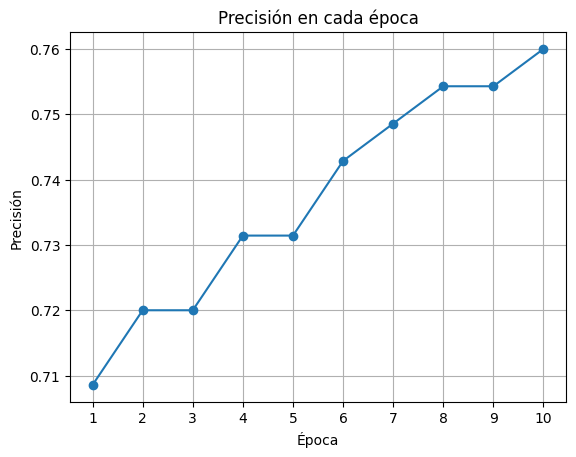

In [45]:
if ejecuta == 4:
    import numpy as np
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt

    # Crear y entrenar el modelo Naive Bayes
    model = MultinomialNB()
    epocas=10

    # Lista para guardar la precisión en cada época
    accuracy_list = []

    # Entrenar el modelo durante 5 épocas
    for epoch in range(epocas):
        model.partial_fit(X_train, y_train.values.ravel(), classes=np.unique(y_train))
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        print(f"Época {epoch + 1}, Precisión: {accuracy}")

    # Graficar la precisión en cada época
    plt.plot(range(1, epocas+1), accuracy_list, marker='o')
    plt.title('Precisión en cada época')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.xticks(range(1, epocas+1))
    plt.grid(True)
    plt.show()


Interpretacion de los datos

Epoch 1/7


c:\Users\IsraCode\Documents\FI\2024-2\textos\venv_sentimientos\sentimientos\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5321 - loss: 0.6908 - val_accuracy: 0.6114 - val_loss: 0.6871
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7917 - loss: 0.6720 - val_accuracy: 0.6971 - val_loss: 0.6743
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8718 - loss: 0.6398 - val_accuracy: 0.7314 - val_loss: 0.6472
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9029 - loss: 0.5736 - val_accuracy: 0.7886 - val_loss: 0.5919
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9465 - loss: 0.4392 - val_accuracy: 0.7886 - val_loss: 0.5138
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9566 - loss: 0.2959 - val_accuracy: 0.8114 - val_loss: 0.4486
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9547 - loss: 0.1865 - val_accuracy: 0.8171 - val_loss: 0.4223
Precisión final en el conjunto de prueba: 0.8171428442001343


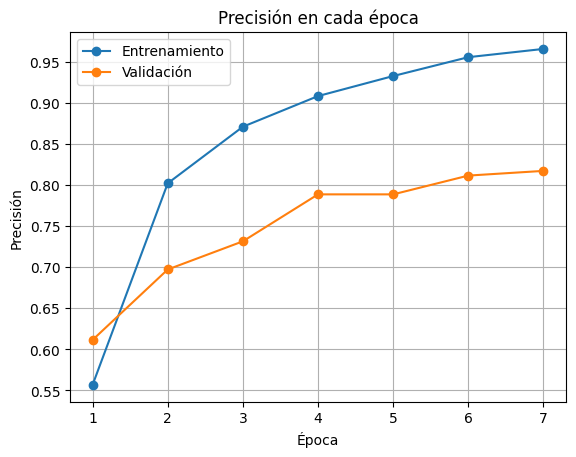

In [46]:
if ejecuta == 4:    
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    epocas=7

    # Cargar los datos preprocesados y las etiquetas
    tfidf_df = pd.read_csv('tfidf_features.csv')
    labels_df = pd.read_csv('labels.csv')

    # Verificar la cantidad de filas en ambos DataFrames
    num_filas_tfidf = len(tfidf_df)
    num_filas_labels = len(labels_df)
    #print(f"Number of rows in tfidf_df: {num_filas_tfidf}")
    #print(f"Number of rows in labels_df: {num_filas_labels}")

    # Recortar tfidf_df si tiene más filas que labels_df
    if num_filas_tfidf > num_filas_labels:
        tfidf_df = tfidf_df.iloc[:num_filas_labels]
    elif num_filas_labels > num_filas_tfidf:
        labels_df = labels_df.iloc[:num_filas_tfidf]

    # Verificar que el número de muestras y etiquetas coincida
    assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo durante 7 épocas y guardar el historial de entrenamiento
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluar el modelo
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Precisión final en el conjunto de prueba: {accuracy}")

    # Graficar la precisión en cada época
    plt.plot(range(1, epocas+1), history.history['accuracy'], marker='o', label='Entrenamiento')
    plt.plot(range(1, epocas+1), history.history['val_accuracy'], marker='o', label='Validación')
    plt.title('Precisión en cada época')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.xticks(range(1, epocas+1))
    plt.legend()
    plt.grid(True)
    plt.show()

Interpretacion de los datos